###Exploration: Empirical CDF, Inverse Transform Sampling and the Newsvendor Inventory Model



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Suppose we have at our disposal a random sample of observations X with an unknown distribution.


**Question 1: Can we obtain a cumulative distribution function based on this random sample?**

**Question 2: Can we obtain the inverted CDF of such a cdf in question 1 that we can use to obtain a new random sample with the same unknown distribution (inverse-transform sampling)?**


I use a X ~ Gamma(4) with 1000 samples as distribution to use but in actual fact we can use any distribution.

In [3]:
x=np.random.gamma(4,size=1000)
#plt.hist(x,bins=50);plt.show()

**Empirical CDF is Defined**:
<br>

F(x) = $\sum_{i=1}^{n}I_{x>i}$ / n

where n = size of sample 

(definition taken from Larry Wasserman All of Statistics page 97)

<br>

**Inverse Empirical CDF**

$F^{−1} : [0, 1] → \mathbf{R}$

$F^{-1}(u)$ = min$\{x:u\in\mathbb[0,1]\text{ and }F(x) \ge u\} $


In [93]:
F=lambda m:sum([1 if i < m else 0 for i in x])/len(x) 
def F_inv(u,F):
  l=[]
  for x in np.linspace(0,15,500):
    if F(x)>=u:
      l.append(x)
  return min(l)

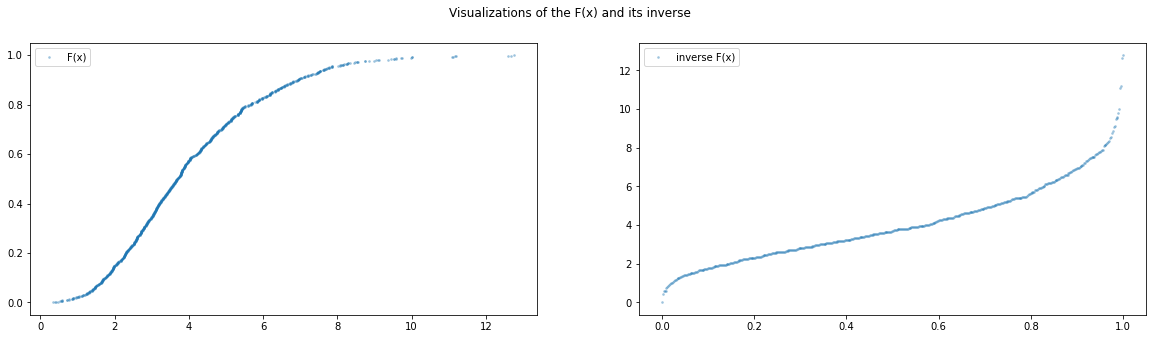

In [98]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.suptitle("Visualizations of the F(x) and its inverse")
ax[0].scatter(x,[F(x) for x in x],label="F(x)",alpha=0.3,s=3)
ax[0].legend()
u=np.linspace(0,1,500)
ax[1].scatter(u,[F_inv(i,F) for i in u],label="inverse F(x)",alpha=0.3,s=3);ax[1].legend()
plt.show()

### Newsvendor Model 

<br>

The Newsvendor model assume Sales = S ~ Normal (mu, sigma^2). 

<br>

We maximizing expected profit the single period optimal order quantity $q^{*}$.

<br>

Expected Profit = $E(p*min(S,q)-q*c-FC)$ 

<br>

where p = price for the newspaper, c= variable cost per unit, FC=fixed cost


<br>

$I(q)$ = $p\int_{-\infty}^{\infty} min(v,q) dv - q*c - FC =  p\int_{-\infty}^{q} vdv -p\int_{q}^{\infty}qdv- q*c - FC $

<br>

$\frac{dI}{dq}=p*q*f(q) +p(1-F(q))-p*q*f(q) - c$ where f is the pdf of r.v. S

<br>

set $\frac{dI}{dq}=0$ to obtain F(X $\ge q^{*})$  = $\frac{(p - c)}{p}$ 

<br>

$\frac{\partial^2 I}{\partial q^2} = -p*f(q) <0 $ hence I(q) is convex so $q^{*}$ maximizes our expected profit $I(q)$

<br>

if S is normally distributed this translates to $q^{*} = Φ^{-1}(\frac{p-c}{p})$

<br>

but what if S is not normally distributed? 

<br>

**in this case we can use our inverse empirical cdf described above in order to find the optimal order quantity q**